In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from utility import util, analysis_parameters as ap
import dask
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()

chunks = {"time":1000, "Xdim":1000}
chunks3D = {"time":500, "Xdim":1000, "lev":10}

othres=200
athres=0.6


In [2]:
# open files
clf_submean = xr.open_dataset("/scratch/b/b380883/TWP_3D_GEOS_clfmean_alb0.6_olr200_20200130-20200228.nc", chunks=chunks3D).cltotal.mean(dim=["time","lat","lon"]).values
clw_submean = xr.open_dataset("/scratch/b/b380883/TWP_3D_GEOS_clwmean_alb0.6_olr200_20200130-20200228.nc", chunks=chunks3D).clw.mean(dim=["time","lat","lon"]).values

clf_submean.shape, clw_submean.shape

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s


((181,), (181,))

In [3]:
# open files
clf_subcf = xr.open_dataset("/scratch/b/b380883/TWP_3D_GEOS_clfcf_alb0.6_olr200_20200130-20200228.nc", chunks=chunks3D).cltotal.mean(dim=["time","lat","lon"]).values
clw_subcf = xr.open_dataset("/scratch/b/b380883/TWP_3D_GEOS_clwcf_alb0.6_olr200_20200130-20200228.nc", chunks=chunks3D).clw.mean(dim=["time","lat","lon"]).values

clf_submean.shape, clw_submean.shape

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s


((181,), (181,))

In [4]:
z = xr.open_dataset(ap.get_fldmean_file("GEOS","TWP","zg"), chunks=chunks3D).zg.mean(axis=(0,2,3)).compute()
z.shape

[########################################] | 100% Completed |  0.1s


(181,)

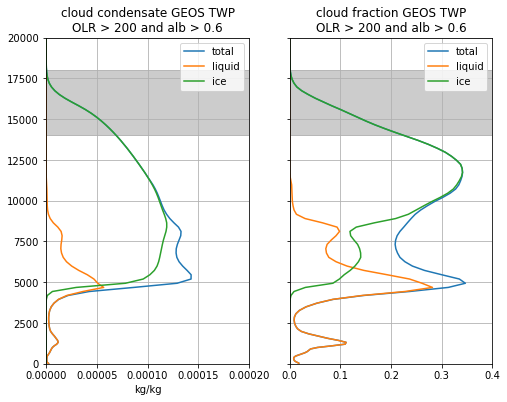

In [5]:
fig, [ax,ay] = plt.subplots(1,2,figsize=(8,6), sharey=True)
ax.plot(clf_submean, z, label="total")
ax.plot(clw_submean, z, label="liquid")
ax.plot(clf_submean-clw_submean, z, label="ice")
ax.set_ylim([0,20000])
ax.legend()
ay.plot(clf_subcf, z, label="total")
ay.plot(clw_subcf, z, label="liquid")
ay.plot(clf_subcf-clw_subcf, z, label="ice")
ay.legend()
ax.fill_between([-1e-2,1],14000,18000,color="k",alpha=0.2)
ay.fill_between([-1e-2,1],14000,18000,color="k",alpha=0.2)
ax.set_title("cloud condensate GEOS TWP\nOLR > {} and alb > {}".format(othres, athres))
ax.set_xlabel("kg/kg")
ay.set_title("cloud fraction GEOS TWP\nOLR > {} and alb > {}".format(othres, athres))
ay.set_xlim([0,0.4])
ax.set_xlim([0,0.0002])
ax.grid()
ay.grid()
plt.savefig("../plots/TWP/GEOS_congestus_{}_{}.png".format(athres, othres))
plt.show()